# Import CSV

In [15]:
import pandas as pd
from datetime import datetime

df = pd.read_csv(".\\InputData\\Natural Gas Futures Historical Data 1997 - 2021.csv")

# Format Dates

In [16]:
from datetime import datetime

df["Date"] = df["Date"].apply(lambda x: datetime.strptime(x, "%b %d, %Y"))

# Convert Volumes to float

In [17]:
def convert_volume(vol_string):
    if vol_string == "-":
        return 0
    
    return 1000 * float(vol_string.replace("K", ""))

df["Vol."] = df["Vol."].apply(convert_volume)

# Arrange/Format Headers

In [18]:
df = df.drop(columns=["Change %"])
df = df.rename(columns={"Price": "Close"})
df = df.rename(columns={"Vol.": "Volume"})

df = df[["Date", "Open", "High", "Low", "Close", "Volume"]]

# Trying out TA-lib

In [19]:
import pandas_ta as ta

df.set_index("Date", inplace=True)
df.sort_index(inplace=True)

# df.ta.log_return(cumulative=True, append=True)
# df.ta.percent_return(cumulative=True, append=True)
# df.ta.sma(length=10, append=True)

# df["GC"] = df.ta.sma(50, append=True) > df.ta.sma(200, append=True)
# df.ta.tsignals(df.GC, asBool=True, append=True)

# df.ta.strategy(ta.AllStrategy)

print(df.tail())

             Open   High    Low  Close   Volume
Date                                           
2021-04-19  52.00  53.10  51.85  52.48   6600.0
2021-04-20  52.00  53.64  51.52  52.82   9320.0
2021-04-21  52.82  53.29  52.20  52.82   5300.0
2021-04-22  53.25  54.71  53.00  53.86   7710.0
2021-04-23  52.15  52.55  49.40  50.72  25590.0


<AxesSubplot:xlabel='Date'>

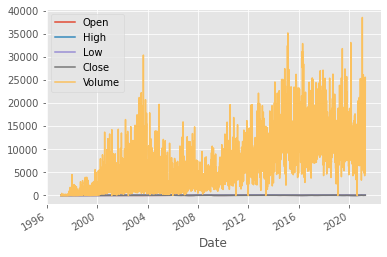

In [20]:
# df.loc[:, ['Open', 'Close']].plot()
df.plot()

# Basic Candlestick Chart Attempt

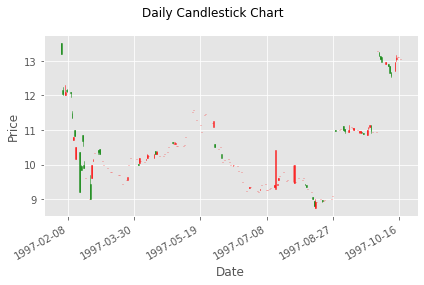

In [21]:
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
from mplfinance import original_flavor

plt.style.use("ggplot")

ohlc = df.head(180)                                         \
         .reset_index(inplace=False)                        \
         .loc[:, ['Date', 'Open', 'High', 'Low', 'Close']]  \
             
ohlc['Date'] = pd.to_datetime(ohlc['Date'])
ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
ohlc = ohlc.astype(float)

fig, ax = plt.subplots()

original_flavor.candlestick_ohlc(ax, ohlc.values, width=0.6, colorup="red", colordown="green", alpha=0.8)

ax.set_xlabel("Date")
ax.set_ylabel("Price")
fig.suptitle("Daily Candlestick Chart")

date_format = mpl_dates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()

plt.show()
